# **Synthetic Dataset**

In [ ]:
import pandas as pd
data = {'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
        'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
        'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
        'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
        'Play Golf': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']}
df = pd.DataFrame(data)
print("DataFrame created successfully.")
df.head()

DataFrame created successfully.


,Outlook,Temperature,Humidity,Windy,Play Golf
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rainy,Mild,High,False,Yes
4,Rainy,Cool,Normal,False,Yes


In [ ]:
categorical_features = ['Outlook', 'Temperature', 'Humidity', 'Windy']
X_encoded = pd.get_dummies(df[categorical_features], drop_first=True)
y_encoded = df['Play Golf'].map({'Yes': 1, 'No': 0})

print("Encoded Features (X_encoded.head()):")
print(X_encoded.head())
print("\nEncoded Target (y_encoded.head()):")
print(y_encoded.head())

Encoded Features (X_encoded.head()):
   Windy  Outlook_Rainy  Outlook_Sunny  Temperature_Hot  Temperature_Mild  \
0  False          False           True             True             False   
1   True          False           True             True             False   
2  False          False          False             True             False   
3  False           True          False            False              True   
4  False           True          False            False             False   

   Humidity_Normal  
0            False  
1            False  
2            False  
3            False  
4             True  

Encoded Target (y_encoded.head()):
0    0
1    0
2    1
3    1
4    1
Name: Play Golf, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (9, 6)
X_test shape: (5, 6)
y_train shape: (9,)
y_test shape: (5,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("X_train_scaled head:")
print(X_train_scaled.head())
print("\nX_test_scaled head:")
print(X_test_scaled.head())

X_train_scaled head:
      Windy  Outlook_Rainy  Outlook_Sunny  Temperature_Hot  Temperature_Mild  \
0 -0.894427      -0.707107       1.118034        -0.534522         -0.894427   
1 -0.894427      -0.707107      -0.894427         1.870829         -0.894427   
2  1.118034      -0.707107       1.118034         1.870829         -0.894427   
3  1.118034       1.414214      -0.894427        -0.534522          1.118034   
4 -0.894427       1.414214      -0.894427        -0.534522         -0.894427   

   Humidity_Normal  
0         1.118034  
1        -0.894427  
2        -0.894427  
3        -0.894427  
4         1.118034  

X_test_scaled head:
      Windy  Outlook_Rainy  Outlook_Sunny  Temperature_Hot  Temperature_Mild  \
0 -0.894427       1.414214      -0.894427        -0.534522          1.118034   
1  1.118034      -0.707107      -0.894427        -0.534522          1.118034   
2 -0.894427      -0.707107       1.118034         1.870829         -0.894427   
3 -0.894427      -0.707107     

In [ ]:
from sklearn.svm import SVC

model = SVC(random_state=42)
model.fit(X_train_scaled, y_train)

print("SVM model trained successfully.")



SVM model trained successfully.


In [ ]:
print(f"Model accuracy on training set: {model.score(X_train_scaled, y_train):.2f}")
print(f"Model accuracy on test set: {model.score(X_test_scaled, y_test):.2f}")

Model accuracy on training set: 0.89
Model accuracy on test set: 0.60


In [ ]:

import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib import pyplot as plt



In [ ]:

def generate_data():
    cfg = load_config()
    data_cfg = cfg['data']

    print("Generating synthetic data...")
    X, y = make_classification(
        n_samples=data_cfg['n_samples'],
        n_features=data_cfg['n_features'],
        n_informative=data_cfg['n_informative'],
        n_redundant=data_cfg['n_redundant'],
        n_clusters_per_class=data_cfg['n_clusters_per_class'],
        class_sep=data_cfg['class_sep'],
        random_state=cfg['experiment']['random_seed']
    )

    cols = [f"feature_{i+1}" for i in range(data_cfg['n_features'])]
    df = pd.DataFrame(X, columns=cols)
    df['target'] = y

    os.makedirs(os.path.dirname(data_cfg['output_path']), exist_ok=True)
    df.to_csv(data_cfg['output_path'], index=False)
    print(f"Data generated and saved to {data_cfg['output_path']}")


In [ ]:

def train_model():
    cfg = load_config()

    data_path = cfg['data']['output_path']
    df = pd.read_csv(data_path)

    X = df.drop(columns=['target'])
    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=cfg['data']['test_size'],
        random_state=cfg['experiment']['random_seed']
    )

    print(f"Training SVM with kernel: {cfg['model']['kernel']}...")
    model = make_pipeline(
        StandardScaler(),
        SVC(
            kernel=cfg['model']['kernel'],
            C=cfg['model']['C'],
            gamma=cfg['model']['gamma']
        )
    )

    model.fit(X_train, y_train)


In [ ]:



def evaluate_model():
    cfg = load_config()

    df = pd.read_csv(cfg['data']['output_path'])
    X = df.drop(columns=['target'])
    y = df['target']

    _, X_test, _, y_test = train_test_split(
        X, y, test_size=cfg['data']['test_size'], random_state=cfg['experiment']['random_seed']
    )

    model = load_model(cfg['model']['save_path'])

    y_pred = model.predict(X_test)

    print("\n--- Evaluation Results ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    if cfg['data']['n_features'] == 2:
        print("Plotting decision boundary...")
        os.makedirs(os.path.dirname(cfg['visualization']['plot_path']), exist_ok=True)

        fig, ax = plt.subplots(figsize=(10, 6))

        DecisionBoundaryDisplay.from_estimator(
            model,
            X,
            response_method="predict",
            cmap=plt.cm.coolwarm,
            plot_method="pcolormesh",
            shading="auto",
            alpha=0.6,
            ax=ax
        )

        scatter = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k", s=50)
        ax.set_title(f"SVM Decision Boundary (Kernel: {cfg['model']['kernel']})")

        plt.savefig(cfg['visualization']['plot_path'])
        print(f"Plot saved to {cfg['visualization']['plot_path']}")
    else:
        print("Skipping decision boundary plot (n_features != 2).")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    if cfg['data']['n_features'] == 2:
        print("Plotting decision boundary...")
        os.makedirs(os.path.dirname(cfg['visualization']['plot_path']), exist_ok=True)

        fig, ax = plt.subplots(figsize=(10, 6))

        DecisionBoundaryDisplay.from_estimator(
            model,
            X,
            response_method="predict",
            cmap=plt.cm.coolwarm,
            plot_method="pcolormesh",
            shading="auto",
            alpha=0.6,
            ax=ax
        )

        scatter = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k", s=50)
        ax.set_title(f"SVM Decision Boundary (Kernel: {cfg['model']['kernel']})")

        plt.savefig(cfg['visualization']['plot_path'])
        print(f"Plot saved to {cfg['visualization']['plot_path']}")
    else:
        print("Skipping decision boundary plot (n_features != 2).")


Starting SVM Experiment Pipeline...
Generating synthetic data...
Data generated and saved to ./data/synthetic_svm_data.csv
------------------------------
Training SVM with kernel: rbf...
------------------------------
Model loaded from ./models/svm_model.joblib

--- Evaluation Results ---
Accuracy: 0.9400

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       104
           1       0.99      0.89      0.93        96

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

Plotting decision boundary...
Plot saved to ./plots/decision_boundary.png

Confusion Matrix:
[[103   1]
 [ 11  85]]
Plotting decision boundary...
Plot saved to ./plots/decision_boundary.png


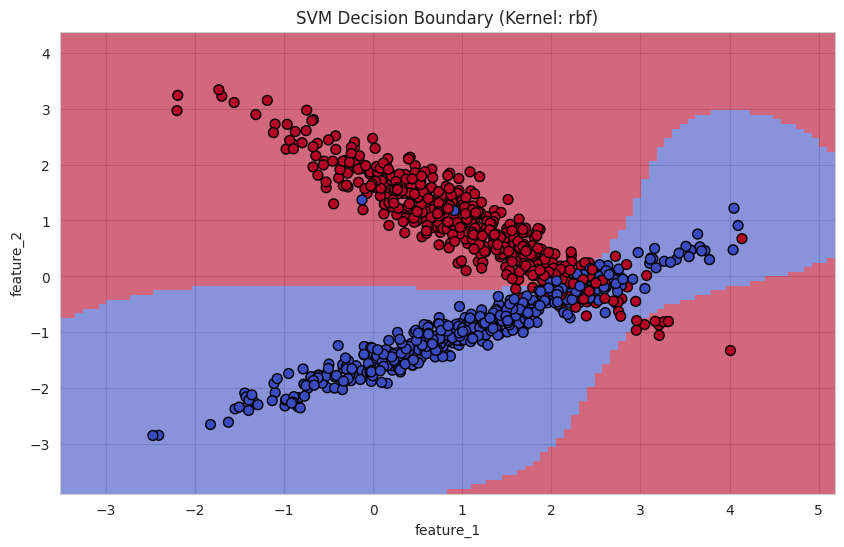

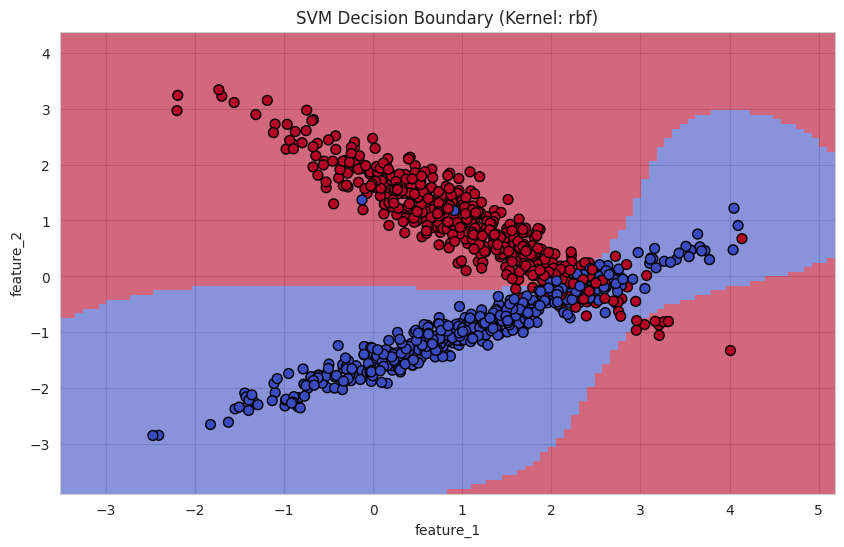

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

def main():


    print("Starting SVM Experiment Pipeline...")
    print("="*30)

    generate_data()
    print("-" * 30)

    train_model()
    print("-" * 30)

    evaluate_model()

if __name__ == "__main__":
    main()

# **Dataset-2**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline


In [ ]:

data = pd.read_csv('credit.csv')
print(data.shape)
data_cleaned = data.dropna()

X = data_cleaned.drop(columns=['ID', 'default.payment.next.month'])
y = data_cleaned['default.payment.next.month']

print("Credit dataset loaded and preprocessed for SVM.")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print("\nFirst 5 rows of features (X):")
print(X.head())
print("\nFirst 5 rows of target (y):")
print(y.head())

(30000, 25)
Credit dataset loaded and preprocessed for SVM.
Features shape: (29998, 23)
Target shape: (29998,)

First 5 rows of features (X):
   LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1  24.0      2      2     -1     -1   
1   120000.0    2          2         2  26.0     -1      2      0      0   
4    50000.0    1          2         1  57.0     -1      0     -1      0   
5    50000.0    1          1         2  37.0      0      0      0      0   
6   500000.0    1          1         2  29.0      0      0      0      0   

   PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0     -2  ...      689.0        0.0        0.0        0.0       0.0     689.0   
1      0  ...     2682.0     3272.0     3455.0     3261.0       0.0    1000.0   
4      0  ...    35835.0    20940.0    19146.0    19131.0    2000.0   36681.0   
5      0  ...    57608.0    19394.0    19619.0    20024.0    2500.0    1815.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)
top_2_features = correlations.index[:2].tolist()

print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')
print(f'Top 2 correlated features for plotting: {top_2_features}')

Training data shape: (20998, 23)
Testing data shape: (9000, 23)
Top 2 correlated features for plotting: ['PAY_0', 'PAY_2']


In [ ]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

X_scaled_full_data = sc.fit_transform(X)

In [ ]:
classifier = SVC(kernel='rbf', C=10, gamma=0.1, random_state=0)
classifier.fit(X_train_scaled, y_train)

top_2_feature_indices = [X.columns.get_loc(col) for col in top_2_features]

X_train_scaled_2d = X_train_scaled[:, top_2_feature_indices]
X_test_scaled_2d = X_test_scaled[:, top_2_feature_indices]
classifier_2d = SVC(kernel='poly', C=10, gamma=0.1, random_state=0)
classifier_2d.fit(X_train_scaled_2d, y_train)

print('SVM Classifier (full features) trained successfully.')
print('SVM Classifier (2 features) trained successfully for plotting.')

SVM Classifier (full features) trained successfully.
SVM Classifier (2 features) trained successfully for plotting.


In [ ]:
y_pred = classifier.predict(X_test_scaled)

In [ ]:
y_pred_all_features = classifier.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_all_features)

print("\nConfusion Matrix:")
print(cm)

accuracy_all_features = accuracy_score(y_test, y_pred_all_features)
print(f'Accuracy Score with ALL features: {accuracy_all_features:.4f}')
print('\nClassification Report with ALL features:')
print(classification_report(y_test, y_pred_all_features))


Confusion Matrix:
[[6587  443]
 [1299  671]]
Accuracy Score with ALL features: 0.8064

Classification Report with ALL features:
              precision    recall  f1-score   support

           0       0.84      0.94      0.88      7030
           1       0.60      0.34      0.44      1970

    accuracy                           0.81      9000
   macro avg       0.72      0.64      0.66      9000
weighted avg       0.78      0.81      0.79      9000



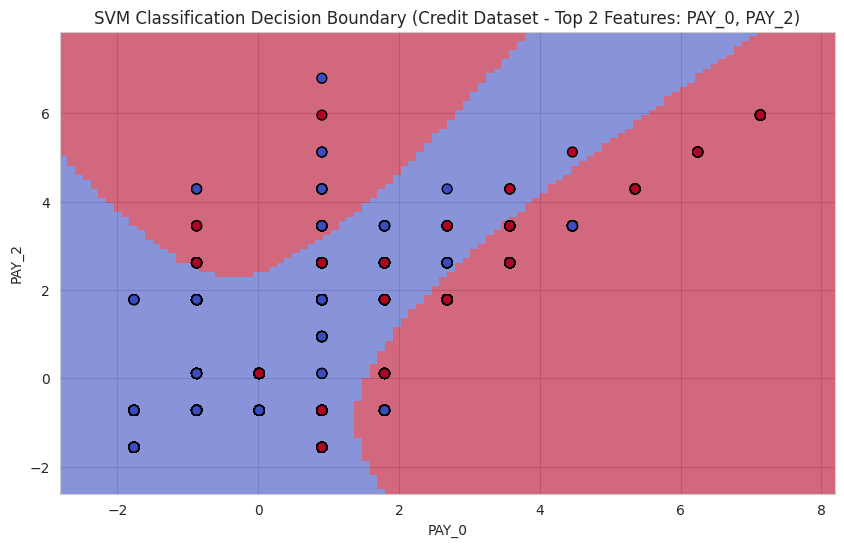

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

DecisionBoundaryDisplay.from_estimator(
    classifier_2d,
    X_scaled_full_data[:, top_2_feature_indices],
    response_method="predict",
    cmap=plt.cm.coolwarm,
    plot_method="pcolormesh",
    shading="auto",
    alpha=0.6,
    ax=ax,
    xlabel=top_2_features[0],
    ylabel=top_2_features[1]
)

scatter = ax.scatter(X_scaled_full_data[:, top_2_feature_indices[0]], X_scaled_full_data[:, top_2_feature_indices[1]], c=y, cmap=plt.cm.coolwarm, edgecolors="k", s=50)

ax.set_title(f"SVM Classification Decision Boundary (Credit Dataset - Top 2 Features: {top_2_features[0]}, {top_2_features[1]})")

plt.show()

In [ ]:
import yaml
import joblib
import os

def load_config(config_path='config.yaml'):
    """Loads configuration from a YAML file."""
    with open(config_path, 'r') as file:
        config = yaml.safe_load(file)
    return config

def save_model(model, path):
    """Saves a trained model to disk."""
    os.makedirs(os.path.dirname(path), exist_ok=True)
    joblib.dump(model, path)
    print(f"Model saved to {path}")

def load_model(path):
    """Loads a trained model from disk."""
    model = joblib.load(path)
    print(f"Model loaded from {path}")
    return model

print("load_config, save_model, and load_model functions defined successfully.")

load_config, save_model, and load_model functions defined successfully.


In [ ]:
config_yaml_content = """
experiment:
  random_seed: 42
data:
  n_samples: 1000
  n_features: 2
  n_informative: 2
  n_redundant: 0
  n_clusters_per_class: 1
  class_sep: 1.0
  test_size: 0.2
  output_path: './data/synthetic_svm_data.csv'
model:
  kernel: 'rbf'
  C: 1.0
  gamma: 'scale'
  save_path: './models/svm_model.joblib'
visualization:
  plot_path: './plots/decision_boundary.png'
"""

with open('config.yaml', 'w') as file:
    file.write(config_yaml_content)

print("Configuration saved to config.yaml")

Configuration saved to config.yaml


In [ ]:
def train_model():
    cfg = load_config()

    data_path = cfg['data']['output_path']
    df = pd.read_csv(data_path)

    X = df.drop(columns=['target'])
    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=cfg['data']['test_size'],
        random_state=cfg['experiment']['random_seed']
    )

    print(f"Training SVM with kernel: {cfg['model']['kernel']}...")
    model = make_pipeline(
        StandardScaler(),
        SVC(
            kernel=cfg['model']['kernel'],
            C=cfg['model']['C'],
            gamma=cfg['model']['gamma']
        )
    )

    model.fit(X_train, y_train)
    save_model(model, cfg['model']['save_path'])

print("train_model function updated to save the model.")

train_model function updated to save the model.


Starting SVM Experiment Pipeline...
Generating synthetic data...
Data generated and saved to ./data/synthetic_svm_data.csv
------------------------------
Training SVM with kernel: rbf...
Model saved to ./models/svm_model.joblib
------------------------------
Model loaded from ./models/svm_model.joblib

--- Evaluation Results ---
Accuracy: 0.9400

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       104
           1       0.99      0.89      0.93        96

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

Plotting decision boundary...
Plot saved to ./plots/decision_boundary.png

Confusion Matrix:
[[103   1]
 [ 11  85]]
Plotting decision boundary...
Plot saved to ./plots/decision_boundary.png


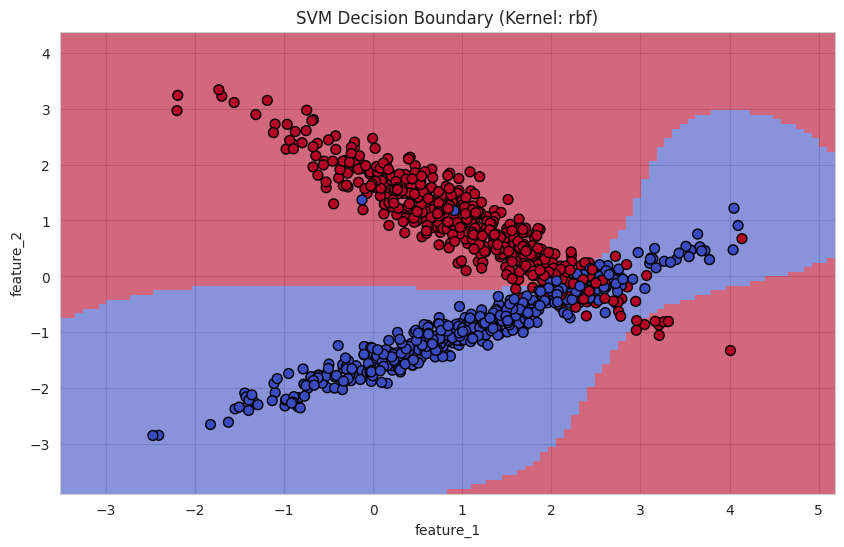

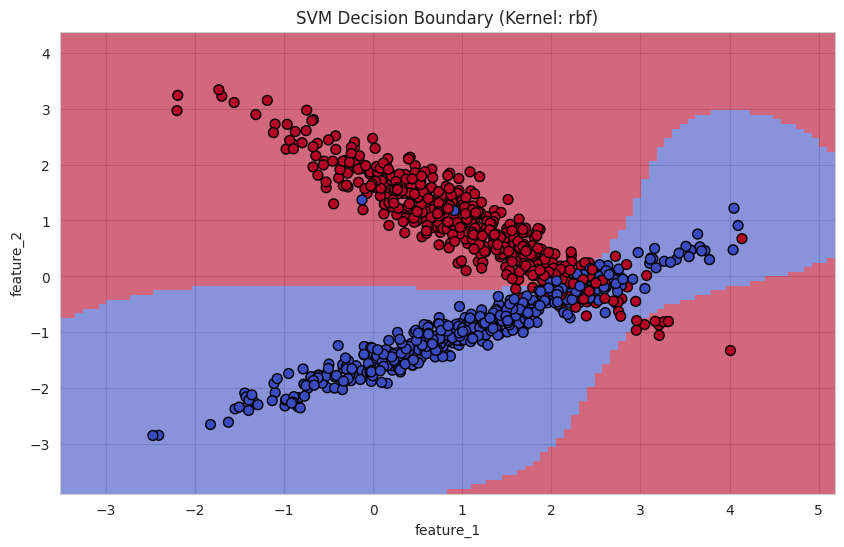

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

def main():


    print("Starting SVM Experiment Pipeline...")
    print("="*30)

    generate_data()
    print("-" * 30)

    train_model()
    print("-" * 30)

    evaluate_model()

if __name__ == "__main__":
    main()